In [1]:
from descartes_rpa.convert.loom import loom_to_anndata
from descartes_rpa.analyze.analyze import scanpy_format
from descartes_rpa import get_pathways_for_group
from descartes_rpa.fetch.descartes import fetch_descartes_by_tissue

In [2]:
fetch_descartes_by_tissue(["Kidney"], out_dir="../data/input")

data url: https://shendure-web.gs.washington.edu/content/members/cao1025/public/FCA_RNA_supp_files/scanpy_cells_by_tissue/Kidney_processed.loom
Downloaded ../data/input/Kidney_data.loom to ../data/input


In [2]:
adata = loom_to_anndata("../data/input/Kidney_data.loom")
scanpy_format(adata=adata)
get_pathways_for_group(adata)

/home/joao/miniconda3/envs/descartes-rpa/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/joao/miniconda3/envs/descartes-rpa/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(
... storing 'Assay' as categorical
... storing 'Batch' as categorical
... storing 'Experiment_batch' as categorical
... storing 'Fetus_id' as categorical
... storing 'Main_cluster_name' as categorical
... storing 'Organ' as categorical
... storing 'Organ_cell_lineage' as categorical
... storing 

In [3]:
from descartes_rpa.io.save import save_data_with_pathways
import os

In [4]:
dir_path = "../data/output/Kidney"
os.mkdir(dir_path)
file = "Kidney"

In [5]:
save_data_with_pathways(adata, directory=dir_path, file=file)

Saving AnnData structure to ../data/output/Kidney/Kidney.h5ad
Saving pathway data from Mesangial cells clusters to ../data/output/Kidney
Saving pathway data from Metanephric cells clusters to ../data/output/Kidney
Saving pathway data from Vascular endothelial cells clusters to ../data/output/Kidney
Saving pathway data from Lymphoid cells clusters to ../data/output/Kidney
Saving pathway data from Stromal cells clusters to ../data/output/Kidney
Saving pathway data from Ureteric bud cells clusters to ../data/output/Kidney
Saving pathway data from Myeloid cells clusters to ../data/output/Kidney
Saving pathway data from Erythroblasts clusters to ../data/output/Kidney
Saving pathway data from Megakaryocytes clusters to ../data/output/Kidney


In [6]:
from descartes_rpa.io.load import load_data_with_pathways

In [7]:
loaded_adata = load_data_with_pathways(directory=dir_path)

Loading ../data/output/Kidney/Metanephric_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Myeloid_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Ureteric_bud_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Megakaryocytes_pathways.csv pathway data.
Loading ../data/output/Kidney/Lymphoid_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Mesangial_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Vascular_endothelial_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Erythroblasts_pathways.csv pathway data.
Loading ../data/output/Kidney/Stromal_cells_pathways.csv pathway data.
Loading ../data/output/Kidney/Kidney.h5ad AnnData file.


In [8]:
loaded_adata.uns["pathways"].keys()

odict_keys(['Metanephric_cells', 'Myeloid_cells', 'Ureteric_bud_cells', 'Megakaryocytes', 'Lymphoid_cells', 'Mesangial_cells', 'Vascular_endothelial_cells', 'Erythroblasts', 'Stromal_cells'])

In [9]:
loaded_adata.uns["pathways"]["Lymphoid_cells"]

,stId,dbId,name,species,llp,entities,reactions,inDisease
0,R-HSA-983170,983170,"Antigen Presentation: Folding, assembly and pe...","{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 102, 'found': 3...","{'resource': 'TOTAL', 'total': 16, 'found': 13...",False
1,R-HSA-1236977,1236977,Endosomal/Vacuolar pathway,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 82, 'found': 37...","{'resource': 'TOTAL', 'total': 4, 'found': 3, ...",False
2,R-HSA-983169,983169,Class I MHC mediated antigen processing & pres...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 473, 'found': 3...","{'resource': 'TOTAL', 'total': 48, 'found': 19...",False
3,R-HSA-1236974,1236974,ER-Phagosome pathway,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 173, 'found': 3...","{'resource': 'TOTAL', 'total': 10, 'found': 3,...",False
4,R-HSA-198933,198933,Immunoregulatory interactions between a Lympho...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 316, 'found': 3...","{'resource': 'TOTAL', 'total': 44, 'found': 13...",False
...,...,...,...,...,...,...,...,...
100,R-HSA-388396,388396,GPCR downstream signalling,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 785, 'found': 1...","{'resource': 'TOTAL', 'total': 168, 'found': 4...",False
101,R-HSA-372790,372790,Signaling by GPCR,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 864, 'found': 1...","{'resource': 'TOTAL', 'total': 354, 'found': 4...",False
102,R-HSA-1430728,1430728,Metabolism,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 3633, 'found': ...","{'resource': 'TOTAL', 'total': 2250, 'found': ...",False
103,R-HSA-162582,162582,Signal Transduction,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 2993, 'found': ...","{'resource': 'TOTAL', 'total': 2445, 'found': ...",False


In [1]:
import scanpy as sc
sc.settings.set_figure_params(dpi=300, facecolor='white')

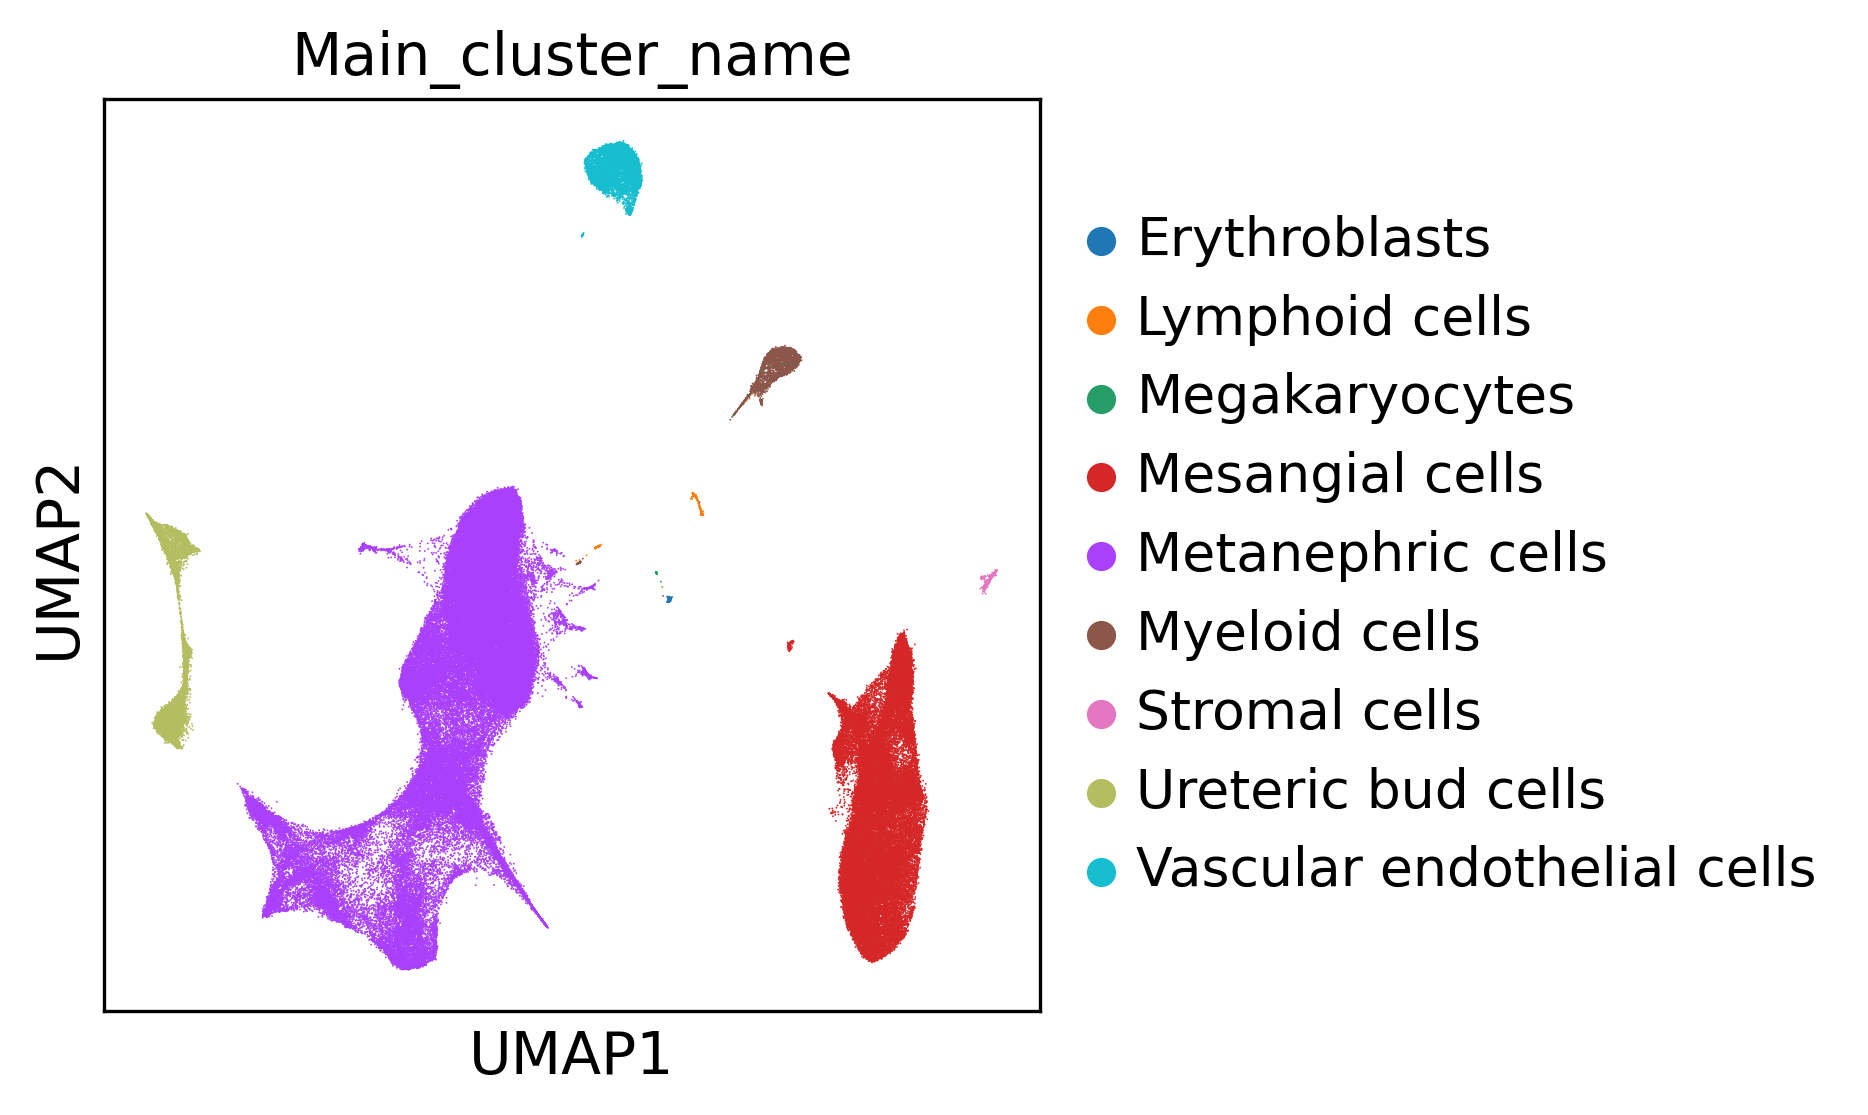

In [3]:
sc.pl.umap(loaded_adata, color="Main_cluster_name")